In [37]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [45]:

Merck_Prices_df = pd.read_csv("./Resources/Merck Prices.csv")
Johnson_Johnson_Prices_df = pd.read_csv("./Resources/Johnson&Johnson Prices.csv")
Abbott_Labs_Prices_df = pd.read_csv("./Resources/Abbott Labs Prices.csv")


In [51]:
Merck_Prices_df = Merck_Prices_df.set_index('Date')
Merck_Prices_df.head()

,Close
Date,
4/9/2019,80.80
4/10/2019,80.82
4/11/2019,79.84
4/12/2019,79.43
4/15/2019,78.53


In [52]:
Johnson_Johnson_Prices_df = Johnson_Johnson_Prices_df.set_index('Date')
Johnson_Johnson_Prices_df.head()

,Close
Date,
4/9/2019,135.57
4/10/2019,135.58
4/11/2019,135.21
4/12/2019,135.98
4/15/2019,136.52


In [53]:
Abbott_Labs_Prices_df = Abbott_Labs_Prices_df.set_index('Date')
Abbott_Labs_Prices_df.head()


,Close
Date,
4/9/2019,78.67
4/10/2019,78.97
4/11/2019,78.51
4/12/2019,78.01
4/15/2019,77.50


In [83]:
MRK_last_price = Merck_Prices_df['Close'][-1]
JNJ_last_price = Johnson_Johnson_Prices_df['Close'][-1]
ABT_last_price = Abbott_Labs_Prices_df['Close'][-1]

MRK_last_price
JNJ_last_price
ABT_last_price

86.04

In [59]:
historical_df = pd.concat([Merck_Prices_df, Johnson_Johnson_Prices_df, Abbott_Labs_Prices_df], axis="columns", join="inner", )

historical_df.columns = ['MRK','JNJ','ABT']
historical_df.head(10)

,MRK,JNJ,ABT
Date,,,
4/9/2019,80.80,135.57,78.67
4/10/2019,80.82,135.58,78.97
4/11/2019,79.84,135.21,78.51
4/12/2019,79.43,135.98,78.01
4/15/2019,78.53,136.52,77.50
4/16/2019,77.56,138.02,76.38
4/17/2019,73.92,138.52,72.88
4/18/2019,73.19,137.52,73.92
4/22/2019,73.46,137.83,74.51


In [68]:
# Save the last day's closing price
MRK_last_price = historical_df['MRK'][-1]
JNJ_last_price = historical_df['JNJ'][-1]
ABT_last_price = historical_df['ABT'][-1]

MRK_last_price
JNJ_last_price
ABT_last_price

86.04

In [69]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns_historical = historical_df.pct_change()
daily_returns_historical.head()

,MRK,JNJ,ABT
Date,,,
4/9/2019,NaN,NaN,NaN
4/10/2019,0.000248,0.000074,0.003813
4/11/2019,-0.012126,-0.002729,-0.005825
4/12/2019,-0.005135,0.005695,-0.006369
4/15/2019,-0.011331,0.003971,-0.006538


In [70]:
# Calculate volatility
# YOUR CODE HERE
std_dev_daily_return = daily_returns_historical.std()
std_dev_daily_return

MRK    0.018940
JNJ    0.018902
ABT    0.021873
dtype: float64

In [73]:

avg_daily_return = daily_returns_historical.mean()
avg_daily_return

MRK    0.000261
JNJ    0.000339
ABT    0.000592
dtype: float64

In [79]:
# Setup the Monte Carlo Parameters
number_simulations = 400
number_records = 90
monte_carlo = pd.DataFrame()

In [91]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):

    print(f"Running Simulation {x}...")
    
    MRK_prices = [MRK_last_price]
    JNJ_prices = [JNJ_last_price]
    ABT_prices = [ABT_last_price]
    
    # YOUR CODE HERE
    

    for n in range(number_records):
        
        simulated_prices = MRK_prices[-1] * (1 + np.random.normal(avg_daily_return['MRK'], std_dev_daily_return['MRK']))
        MRK_prices.append(simulated_prices)
    
        simulated_prices = JNJ_prices[-1] * (1 + np.random.normal(avg_daily_return['JNJ'], std_dev_daily_return['JNJ']))
        JNJ_prices.append(simulated_prices)
        
        simulated_prices = ABT_prices[-1] * (1 + np.random.normal(avg_daily_return['ABT'], std_dev_daily_return['ABT']))
        ABT_prices.append(simulated_prices)
    
   # Create a DataFrame of the simulated prices  
    portfolio = pd.DataFrame({
        "MRK Simulated Prices": MRK_prices,
        "JNJ Simulated Prices": JNJ_prices,
        "ABT Simulated Prices": ABT_prices
    })
    
    
    portfolio_returns=portfolio.pct_change()   
    
    weights = [0.33, 0.33, 0.34]
    
    
    weighted_portfolio_returns = portfolio_returns.dot(weights) 
    
    monte_carlo[x] = (1+ weighted_portfolio_returns.fillna(0)).cumprod()

Running Simulation 0...
Running Simulation 1...
Running Simulation 2...
Running Simulation 3...
Running Simulation 4...
Running Simulation 5...
Running Simulation 6...
Running Simulation 7...
Running Simulation 8...
Running Simulation 9...
Running Simulation 10...
Running Simulation 11...
Running Simulation 12...
Running Simulation 13...
Running Simulation 14...
Running Simulation 15...
Running Simulation 16...
Running Simulation 17...
Running Simulation 18...
Running Simulation 19...
Running Simulation 20...
Running Simulation 21...
Running Simulation 22...
Running Simulation 23...
Running Simulation 24...
Running Simulation 25...
Running Simulation 26...
Running Simulation 27...
Running Simulation 28...
Running Simulation 29...
Running Simulation 30...
Running Simulation 31...
Running Simulation 32...
Running Simulation 33...
Running Simulation 34...
Running Simulation 35...
Running Simulation 36...
Running Simulation 37...
Running Simulation 38...
Running Simulation 39...
Running Si

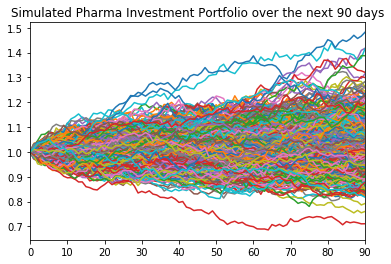

In [92]:
# Visualize the Simulation
# YOUR CODE HERE
monte_carlo.plot(legend=None, title = "Simulated Pharma Investment Portfolio over the next 90 days")

In [ ]:
#initial_investment = 10000
#weights = [0.25, 0.25, 0.25, 0.25]
#portfolio_returns = daily_returns.dot(weights)
#portfolio_returns.head()

In [14]:
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

---

In [ ]:
# YOUR CODE HERE

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE